In [354]:
import numpy as np 
import pandas as pd 
from datetime import datetime

In [355]:
df = pd.read_csv("waypoints1808-robot-dlo-odom_node-odom.csv")
df.head()

,time,PosX,PosY,PosZ,.pose.pose.orientation.x,.pose.pose.orientation.y,.pose.pose.orientation.z,.pose.pose.orientation.w
0,2022/08/18/10:13:34.757384,0.212239,0.007143,-0.004472,0.000054,0.000379,-0.001716,0.999999
1,2022/08/18/10:13:34.858447,0.249797,0.003233,-0.004513,-0.000383,-0.000084,-0.001840,0.999998
2,2022/08/18/10:13:34.958576,0.302775,0.006424,-0.005323,0.000157,-0.000086,-0.002097,0.999998
3,2022/08/18/10:13:35.057059,0.348197,0.006778,-0.005709,-0.000318,0.000076,-0.002649,0.999996
4,2022/08/18/10:13:35.158055,0.399115,0.007444,-0.006207,-0.000683,-0.000405,-0.002973,0.999995


In [356]:
df['time']= df['time'].apply(lambda x: datetime.strptime(x.strip(), '%Y/%m/%d/%H:%M:%S.%f'))
df['time']

0     2022-08-18 10:13:34.757384
1     2022-08-18 10:13:34.858447
2     2022-08-18 10:13:34.958576
3     2022-08-18 10:13:35.057059
4     2022-08-18 10:13:35.158055
                 ...            
582   2022-08-18 10:14:32.954967
583   2022-08-18 10:14:33.055730
584   2022-08-18 10:14:33.155388
585   2022-08-18 10:14:33.257295
586   2022-08-18 10:14:33.356550
Name: time, Length: 587, dtype: datetime64[ns]

In [357]:
df.head(5)

,time,PosX,PosY,PosZ,.pose.pose.orientation.x,.pose.pose.orientation.y,.pose.pose.orientation.z,.pose.pose.orientation.w
0,2022-08-18 10:13:34.757384,0.212239,0.007143,-0.004472,0.000054,0.000379,-0.001716,0.999999
1,2022-08-18 10:13:34.858447,0.249797,0.003233,-0.004513,-0.000383,-0.000084,-0.001840,0.999998
2,2022-08-18 10:13:34.958576,0.302775,0.006424,-0.005323,0.000157,-0.000086,-0.002097,0.999998
3,2022-08-18 10:13:35.057059,0.348197,0.006778,-0.005709,-0.000318,0.000076,-0.002649,0.999996
4,2022-08-18 10:13:35.158055,0.399115,0.007444,-0.006207,-0.000683,-0.000405,-0.002973,0.999995


In [358]:
import math 
import matplotlib.pyplot as plt
import datetime 

In [359]:
lastPx = 0 
lastPy = 0 
lastT = 0 
vMag = []
timeStamp = []
t = []
for idx , (currentT , currentPx, currentPy) in enumerate (zip(df.time ,df.PosX, df.PosY)):
    #if idx !=0:  
    currentT = currentT.timestamp() #- df.time[0].timestamp()
    # else:
        # currentT = 0 
    timeStamp.append((currentT)) # in mins
    t.append(currentT-timeStamp[0])
    dt = currentT-lastT
    # print(dt) 
    dx = currentPx - lastPx
    # print(dx)
    dy = currentPy - lastPy
    # print(dy)
    # try:
    currentVx = float(dx)/float(dt)
    # except:
        # print("division by Zero , 2lak ma henta ")
    currentVy = float(dy/dt) 
    
    vMag.append(math.sqrt(currentVx**2 + currentVy**2))
    lastT , lastPx  , lastPy  = currentT , currentPx  , currentPy 

df['Vmag'] = vMag
df['t'] = t
# print(t)

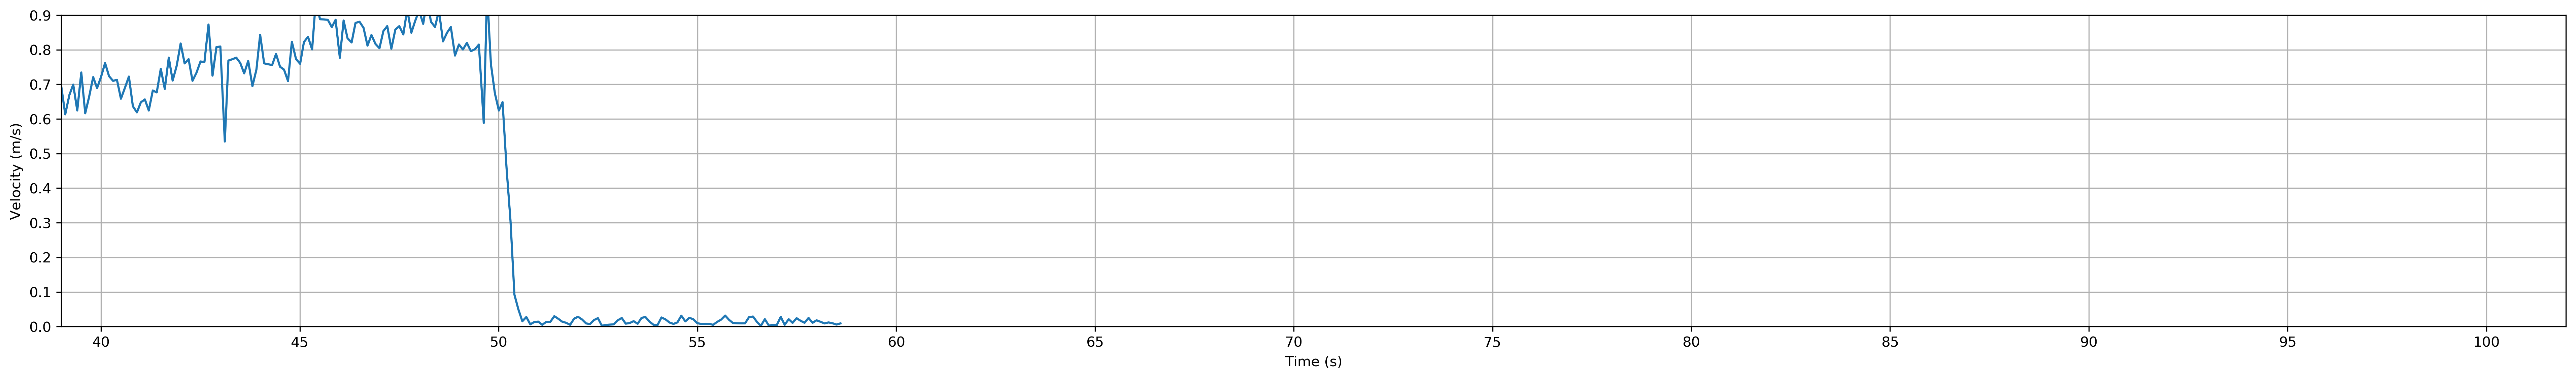

In [360]:
plt.figure(dpi=300, figsize=(32,4))
plt.grid()
plt.xlim(39,102)
plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(t, vMag)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


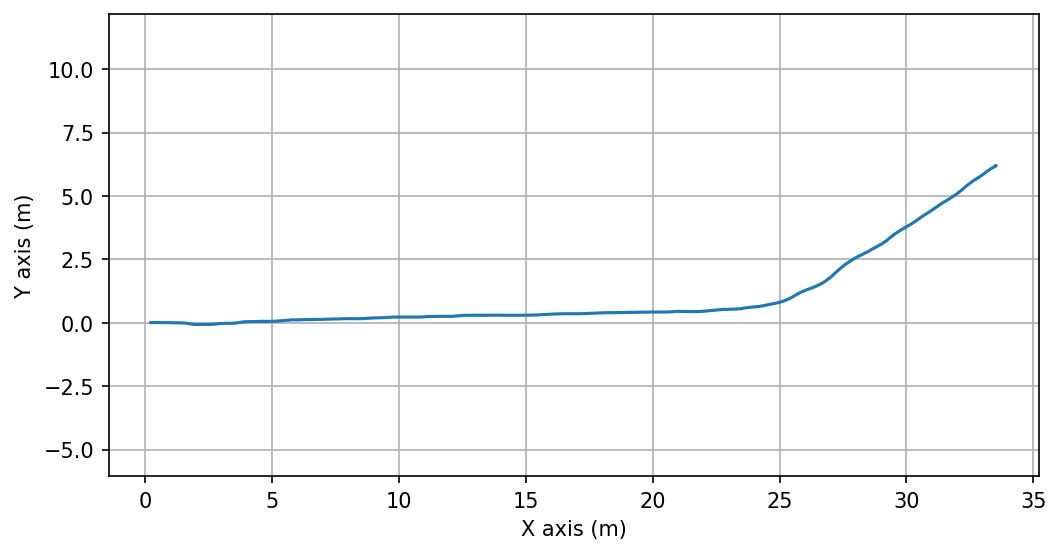

In [361]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(df.PosX , df.PosY)


In [362]:
df.head()

,time,PosX,PosY,PosZ,.pose.pose.orientation.x,.pose.pose.orientation.y,.pose.pose.orientation.z,.pose.pose.orientation.w,Vmag,t
0,2022-08-18 10:13:34.757384,0.212239,0.007143,-0.004472,0.000054,0.000379,-0.001716,0.999999,1.278645e-10,0.000000
1,2022-08-18 10:13:34.858447,0.249797,0.003233,-0.004513,-0.000383,-0.000084,-0.001840,0.999998,3.736325e-01,0.101063
2,2022-08-18 10:13:34.958576,0.302775,0.006424,-0.005323,0.000157,-0.000086,-0.002097,0.999998,5.300614e-01,0.201192
3,2022-08-18 10:13:35.057059,0.348197,0.006778,-0.005709,-0.000318,0.000076,-0.002649,0.999996,4.612262e-01,0.299675
4,2022-08-18 10:13:35.158055,0.399115,0.007444,-0.006207,-0.000683,-0.000405,-0.002973,0.999995,5.041995e-01,0.400671


In [363]:
carla_df = pd.DataFrame([df.PosX ,df.PosY , df.Vmag, df.t]).transpose()
carla_df.columns=['X','Y','V','Tway']
carla_df.Y = carla_df.Y * -1 
carla_df.head() 

,X,Y,V,Tway
0,0.212239,-0.007143,1.278645e-10,0.000000
1,0.249797,-0.003233,3.736325e-01,0.101063
2,0.302775,-0.006424,5.300614e-01,0.201192
3,0.348197,-0.006778,4.612262e-01,0.299675
4,0.399115,-0.007444,5.041995e-01,0.400671


In [364]:
carla_df.to_csv("racetrack_waypoints.txt", header=False,index=False)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


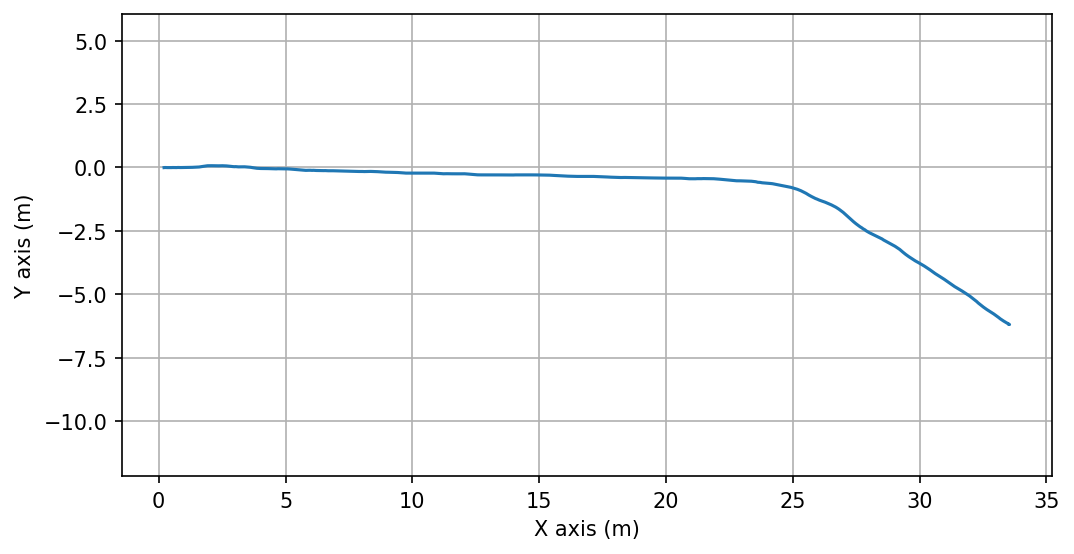

In [365]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(carla_df.X , carla_df.Y)

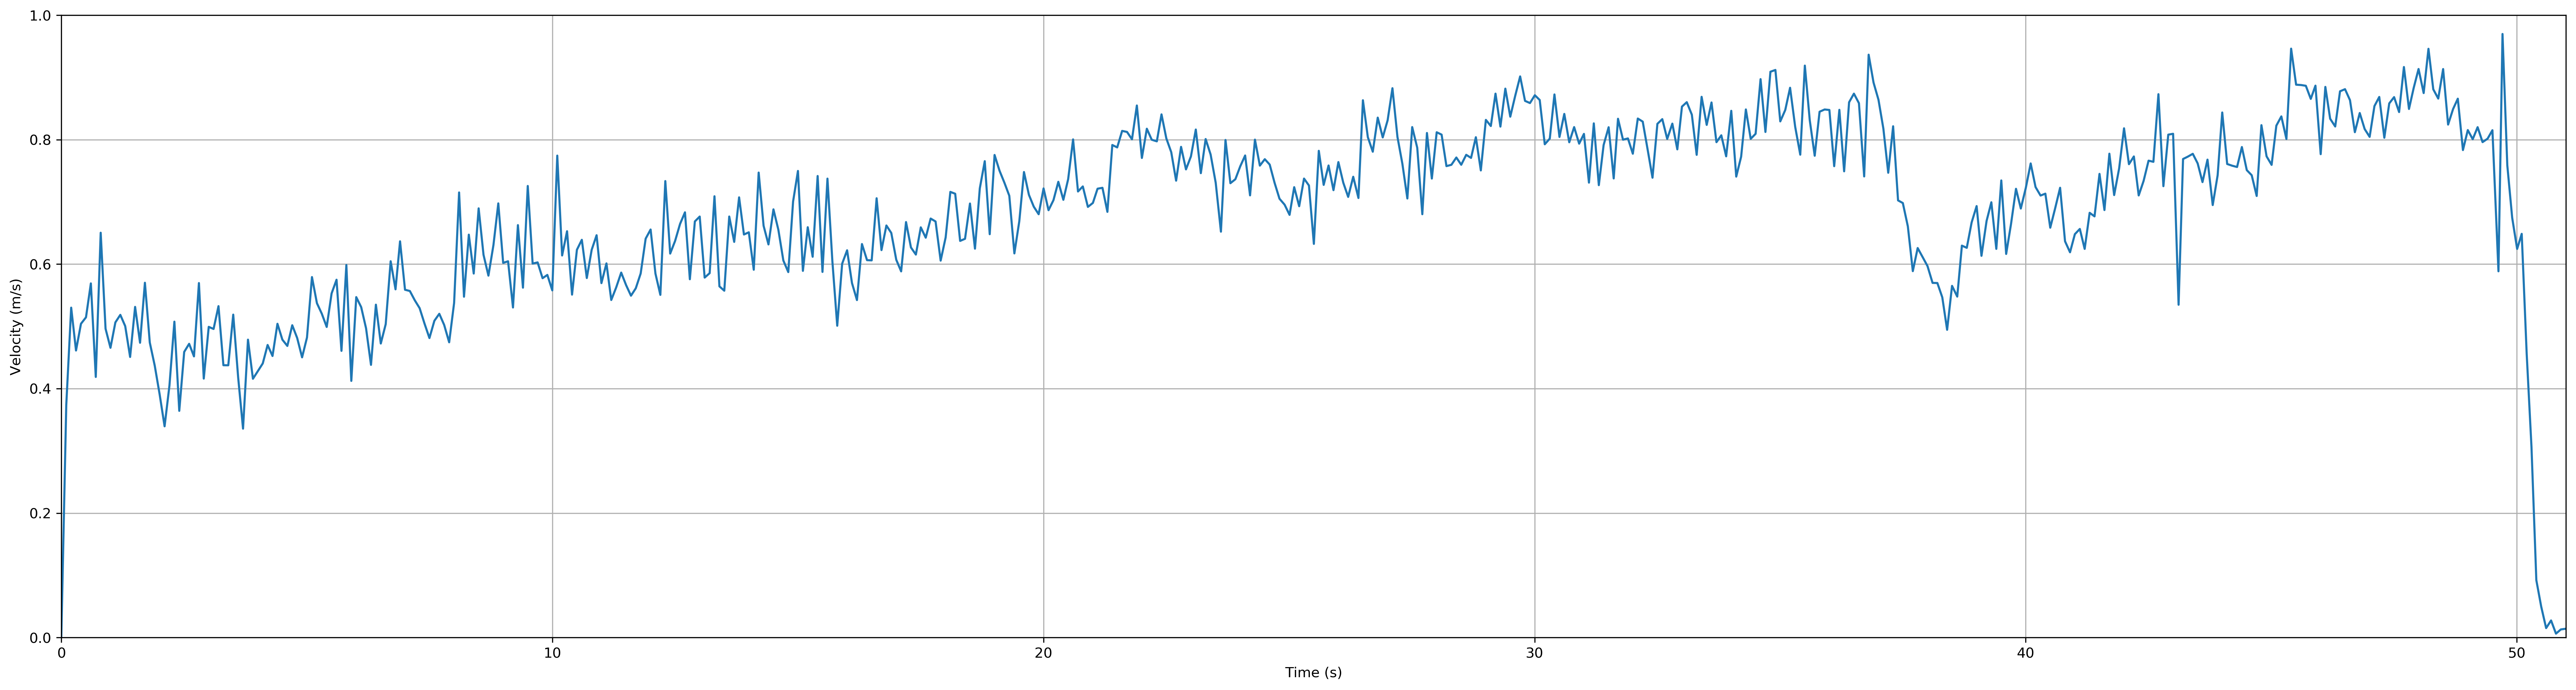

In [366]:
plt.figure(dpi=300, figsize=(32,8))
plt.grid()
plt.xlim(0,51)
plt.ylim(0,1)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(t, carla_df.V)

In [367]:
carla_df_avgV = pd.DataFrame([df.PosX ,df.PosY,df.Vmag ]).transpose()
carla_df_avgV.columns=['X','Y','V']
carla_df_avgV.head() 

,X,Y,V
0,0.212239,0.007143,1.278645e-10
1,0.249797,0.003233,3.736325e-01
2,0.302775,0.006424,5.300614e-01
3,0.348197,0.006778,4.612262e-01
4,0.399115,0.007444,5.041995e-01


In [368]:
carla_df_avgV.V = carla_df.V.mean()
carla_df_avgV.head()

,X,Y,V
0,0.212239,0.007143,0.59867
1,0.249797,0.003233,0.59867
2,0.302775,0.006424,0.59867
3,0.348197,0.006778,0.59867
4,0.399115,0.007444,0.59867


In [369]:
# sample_df = carla_df_avgV[start:finish]
sample_df = carla_df[1:41]
# print(sample_df)
print(sample_df.shape)
def avg_calc(sample):
  return sample.mean()
  
x,y,v,t = avg_calc(sample= sample_df)
print(x,y,v,t)

(40, 4)
1.198268252983689 0.014374439920356974 0.47046721673818703 2.051768660545349


In [370]:
print(carla_df.shape)

(587, 4)


In [371]:
carla_df.head()

,X,Y,V,Tway
0,0.212239,-0.007143,1.278645e-10,0.000000
1,0.249797,-0.003233,3.736325e-01,0.101063
2,0.302775,-0.006424,5.300614e-01,0.201192
3,0.348197,-0.006778,4.612262e-01,0.299675
4,0.399115,-0.007444,5.041995e-01,0.400671


#### Build waypoints

In [372]:
start = 0
increment = 10
finish = start + increment 
t_wp = []
x = []
y = []
v = []

x.append(carla_df.X[0])
y.append(carla_df.Y[0])
v.append(carla_df.V[0])
t_wp.append(0.0)
t_wp_0 = carla_df.Tway[0]

# print('    X\t\t      Y\t\t     V\t\t     T')
for i in range((carla_df.shape[0] - start)//increment):
    sample_df = carla_df[start:finish]
    xVal, yVal, vVal, tVal = avg_calc(sample= sample_df)
    x.append(xVal)
    y.append(yVal)
    v.append(vVal)
    t_wp.append(tVal-t_wp_0)
    
    # print(round(xVal,6),'\t',round(yVal,6),'\t',round(vVal,6),'\t',round(tVal-t_wp_0,6))

    start = finish
    finish += increment

# print((t_wp))
waypoints_df = pd.DataFrame()
waypoints_df['X'] = x
waypoints_df['Y'] = y
waypoints_df['V'] = v
waypoints_df['T'] = t_wp
# waypoints_df['V_avg'] = waypoints_df['V'].rolling(15).mean()
# waypoints_df.columns=['T','X','Y','V']
waypoints_df.shape

(59, 4)

In [373]:
# from math import nan

# for i in range(0,14):
#     waypoints_df['V_avg'][i] = waypoints_df['V_avg'][14]/13 * i
# waypoints_df['V_avg']

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


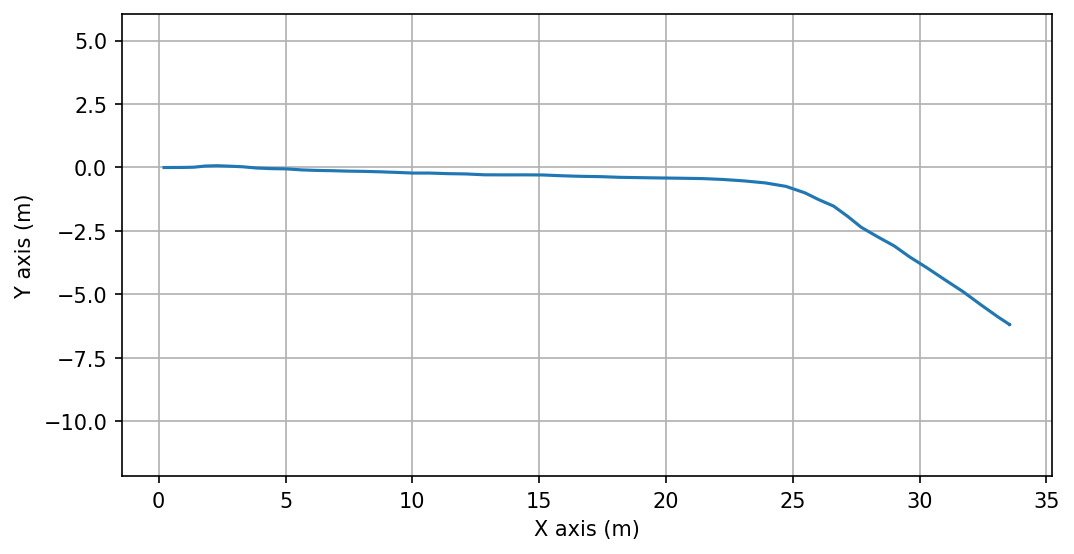

In [374]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(waypoints_df.X , waypoints_df.Y)

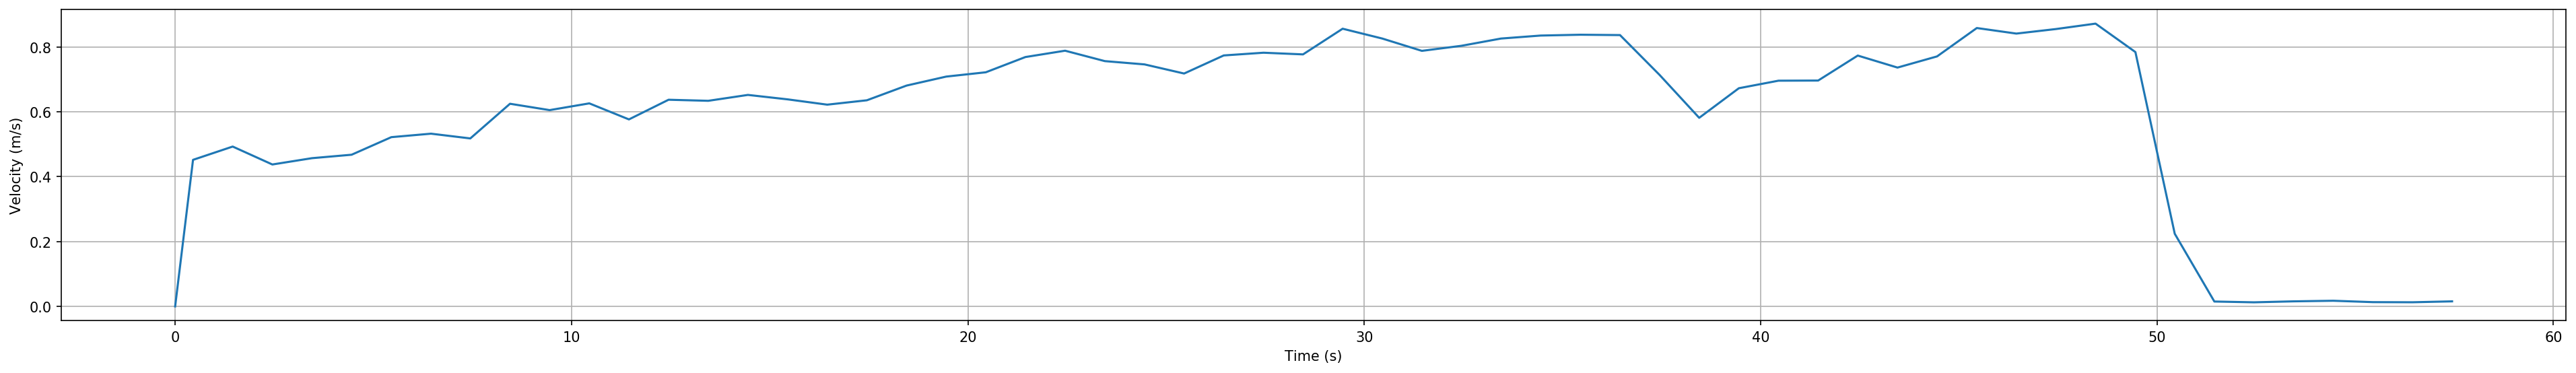

In [375]:
plt.figure(dpi=150, figsize=(32,4))
plt.grid()
# plt.xlim(39,102)
# plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(t_wp, v)

#### This is to check when is the car going to move 

In [376]:
df.index[(df['t'] >= 39.0) & (df['t']<=40.0)]
for i in range(390,400):
    print(df.iloc[i])

time                        2022-08-18 10:14:13.757692
PosX                                         26.339069
PosY                                           1.39717
PosZ                                         -0.036877
.pose.pose.orientation.x                      0.019467
.pose.pose.orientation.y                     -0.021486
.pose.pose.orientation.z                      0.125772
.pose.pose.orientation.w                      0.991635
Vmag                                          0.693273
t                                            39.000308
Name: 390, dtype: object
time                        2022-08-18 10:14:13.856519
PosX                                         26.394823
PosY                                          1.420967
PosZ                                         -0.034839
.pose.pose.orientation.x                      0.019429
.pose.pose.orientation.y                     -0.021772
.pose.pose.orientation.z                      0.127942
.pose.pose.orientation.w                

In [377]:
waypoints_df.head()

,X,Y,V,T
0,0.212239,-0.007143,1.278645e-10,0.000000
1,0.430096,-0.005819,4.518127e-01,0.451274
2,0.936497,-0.003438,4.927709e-01,1.452065
3,1.387235,0.006250,4.375186e-01,2.452356
4,1.851425,0.053019,4.569480e-01,3.451074


In [378]:
# waypoints_df.V = waypoints_df.V.mean()* 1.5
# waypoints_df.head()

In [379]:
# waypoints_df.Y = -1 * waypoints_df.Y

# finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V_avg]).transpose()
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("racetrack_waypoints.txt", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.212239,-0.007143,1.278645e-10
1,0.430096,-0.005819,4.518127e-01
2,0.936497,-0.003438,4.927709e-01
3,1.387235,0.006250,4.375186e-01
4,1.851425,0.053019,4.569480e-01


In [380]:
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("rp.csv", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.212239,-0.007143,1.278645e-10
1,0.430096,-0.005819,4.518127e-01
2,0.936497,-0.003438,4.927709e-01
3,1.387235,0.006250,4.375186e-01
4,1.851425,0.053019,4.569480e-01


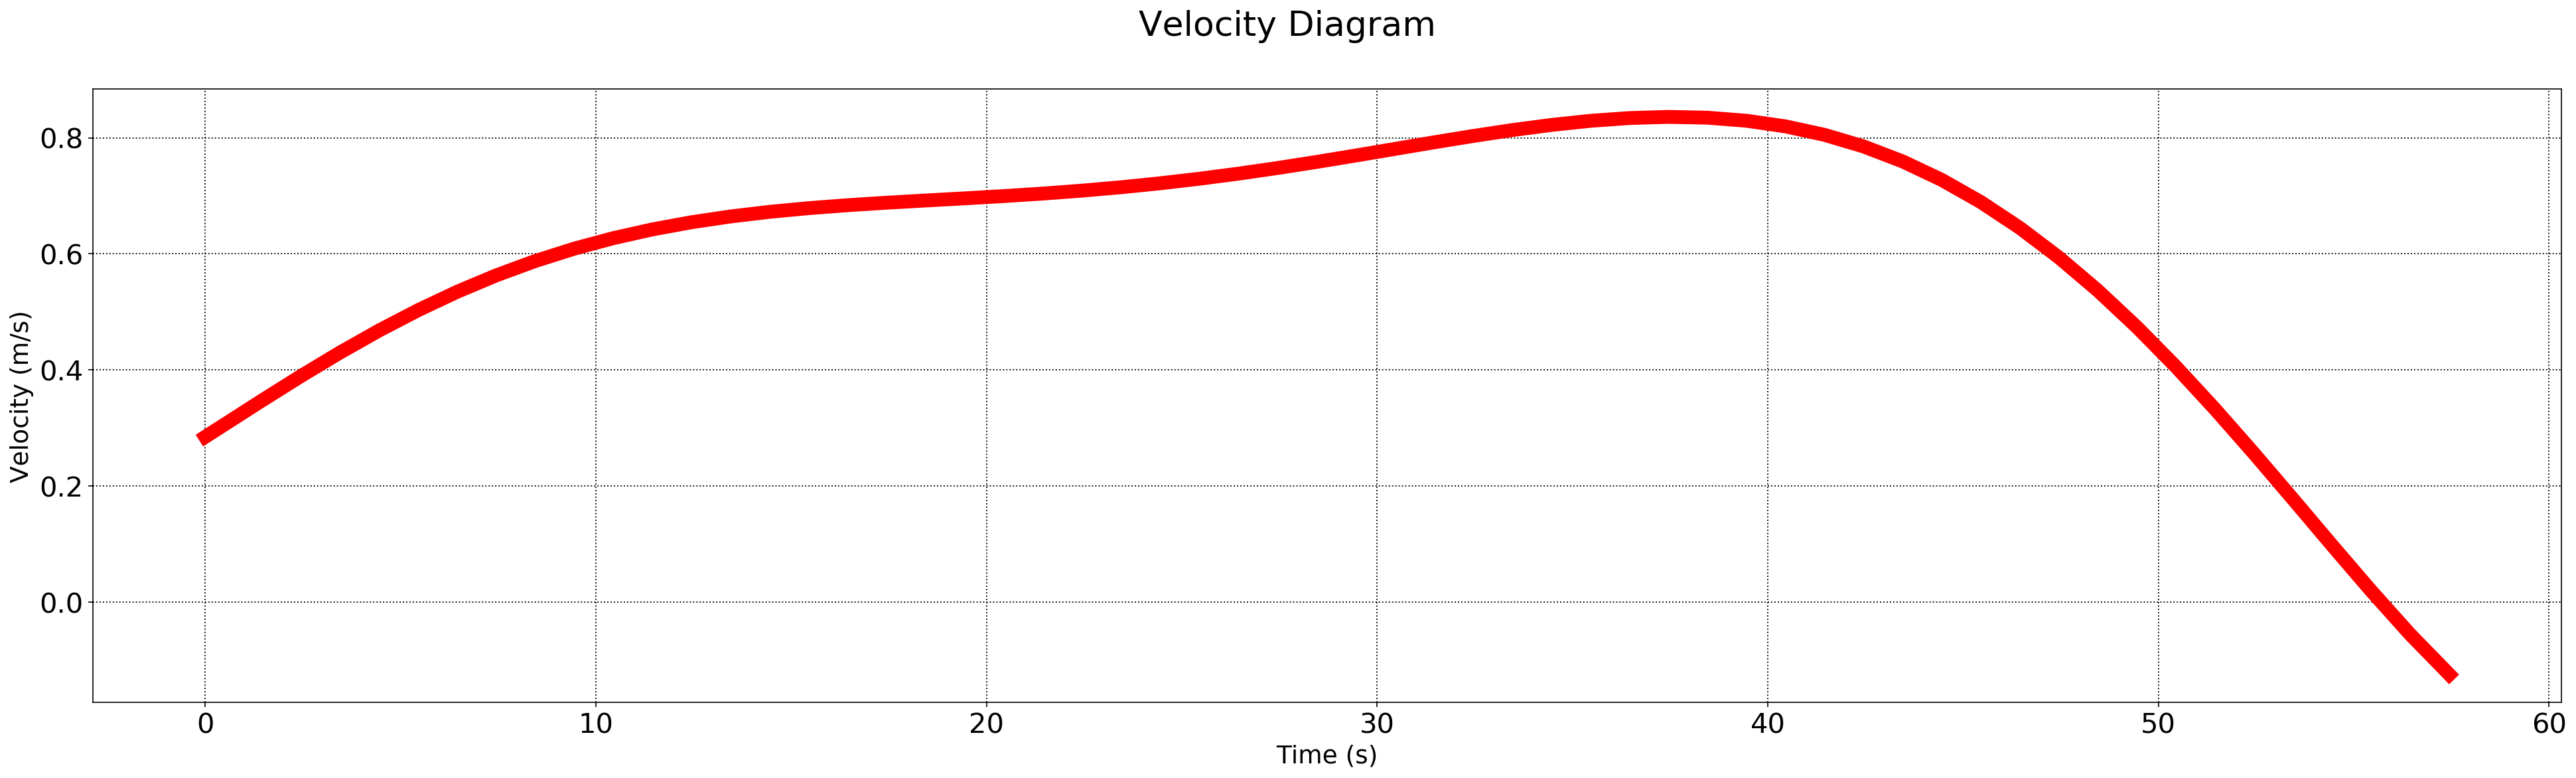

In [381]:
from turtle import color


polyV = waypoints_df.V.to_numpy()
# print(polyV)
V_polyfit = []
V_fcn = np.poly1d(np.polyfit(t_wp , polyV,6))
for i in t_wp:
    V_polyfit.append(V_fcn(i))
# print(V_fcn(t_wp[0]))
# print(V_polyfit)

plt.figure(dpi=150, figsize=(32,8))
plt.suptitle('Velocity Diagram', fontsize=25)
plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
# plt.xlim(0,65)
# plt.ylim(0,0.6)
plt.tick_params(axis='both', labelsize=20)

plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Velocity (m/s)',fontsize=18)

# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(t_wp, V_polyfit, color ='r',linewidth=10)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


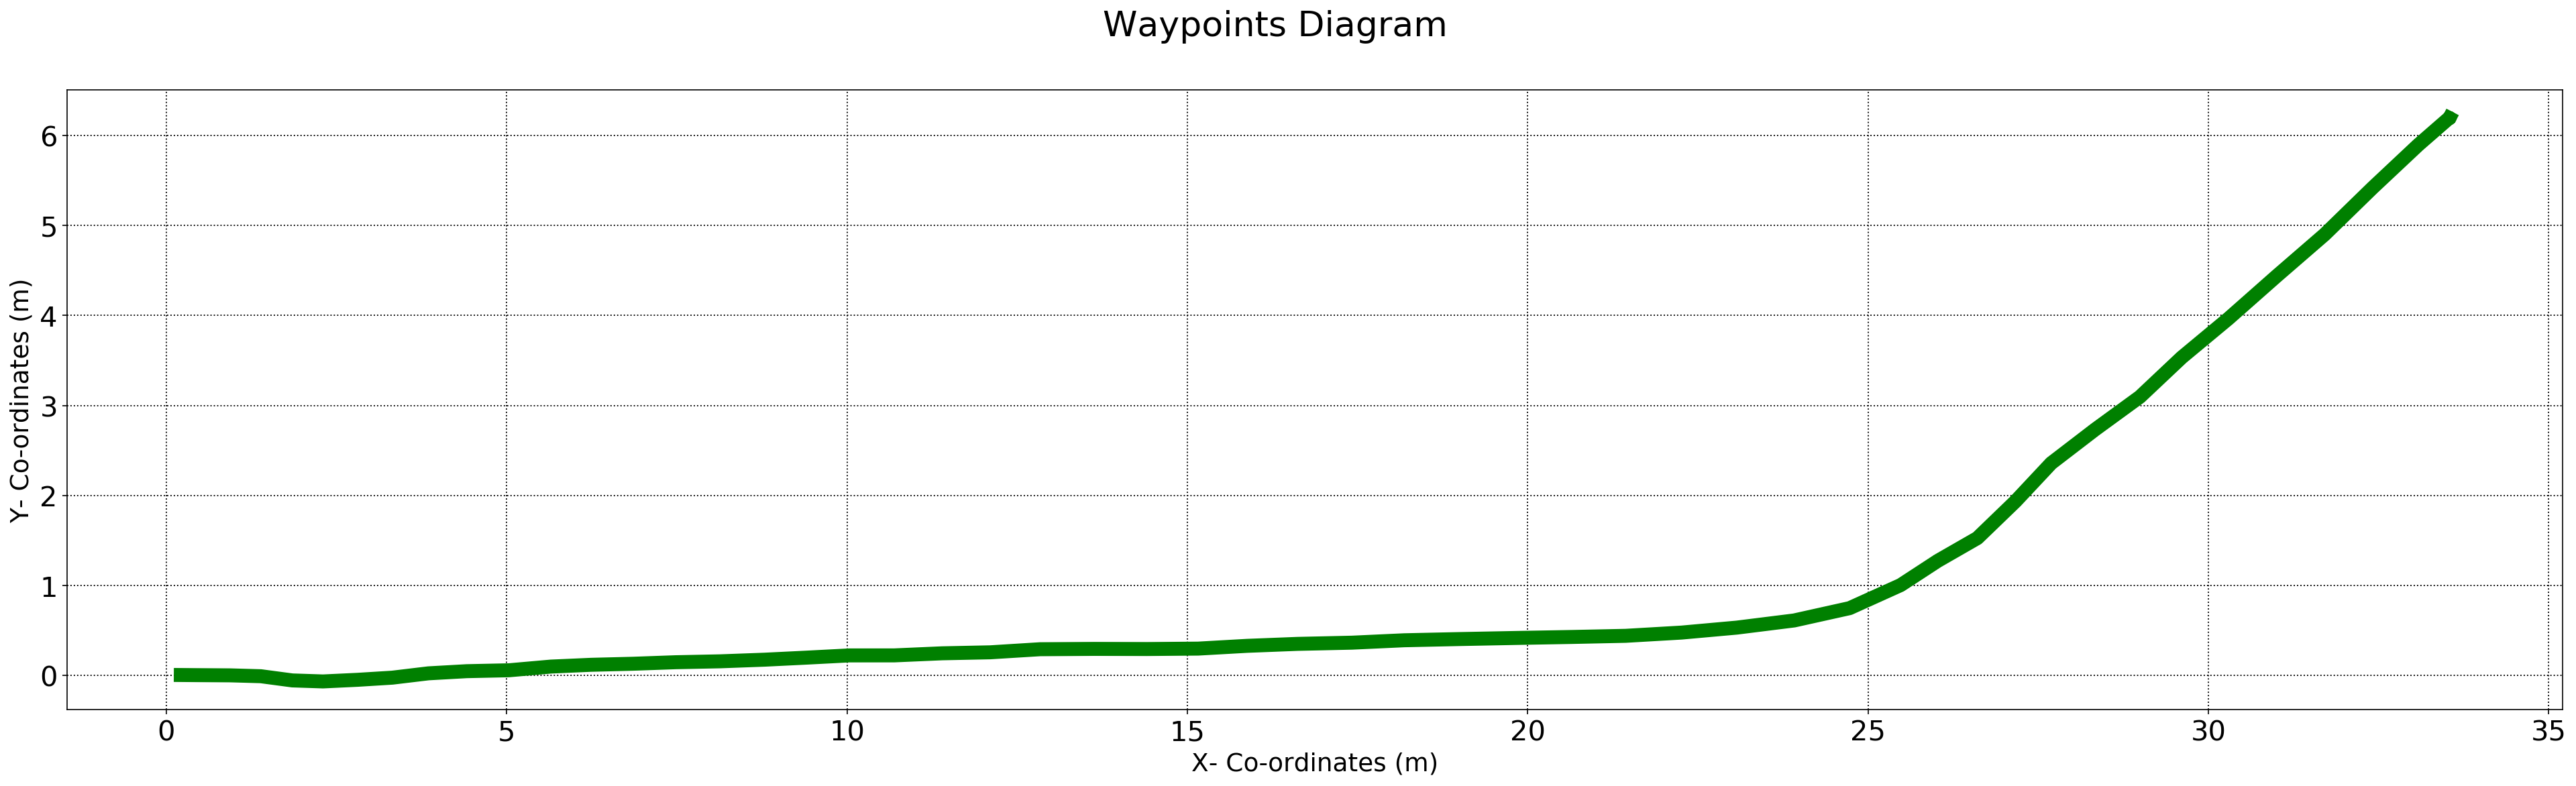

In [382]:
plt.figure(dpi=150, figsize=(32,8))
plt.suptitle('Waypoints Diagram', fontsize=25)
plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
plt.tick_params(axis='both', labelsize=20)
plt.xlabel('X- Co-ordinates (m)',fontsize=18)
plt.ylabel('Y- Co-ordinates (m)',fontsize=18)
plt.plot(finaldf.X , finaldf.Y *-1 , color= 'g', linewidth=10)

In [383]:
waypoints_df.V =  V_polyfit
waypoints_df.V *= 1.0
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("racetrack_waypoints.txt", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.212239,-0.007143,0.284955
1,0.430096,-0.005819,0.304405
2,0.936497,-0.003438,0.347555
3,1.387235,0.006250,0.389795
4,1.851425,0.053019,0.430179


In [384]:
df2 = pd.read_csv("C:/Users/Admin/Downloads/uuTN7y7rEemnrA4AsaAhFA_bbb340f02eeb11e9a59e73356fd63643_CarlaUE4Windows/CarlaSimulator/PythonClient/Course1FinalProject/racetrack_waypoints_or.csv")
df2.head()
df2.columns=['X_Carla','Y_Carla','V_Carla']
df2['X_Carla'] = df2['X_Carla'] - df2['X_Carla'][0]
df2['Y_Carla'] = df2['Y_Carla'] - df2['Y_Carla'][0]
plt.figure(dpi=100, figsize=(8,4))
plt.grid()
plt.axis('equal')   
plt.plot(-df2.Y_Carla[0:30] ,df2.X_Carla[0:30], waypoints_df.X , waypoints_df.Y)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Admin/Downloads/uuTN7y7rEemnrA4AsaAhFA_bbb340f02eeb11e9a59e73356fd63643_CarlaUE4Windows/CarlaSimulator/PythonClient/Course1FinalProject/racetrack_waypoints_or.csv'